In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

## import the library below:

In [2]:
from PyEyeSim import EyeData


In [3]:
%load_ext autoreload
%autoreload 2

## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [4]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_fixations.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))


(48675, 19)


In [5]:
FixData

,id,task,sid,eye,stimfile,trialid,start_ms,end_ms,duration_ms,fix_x,fix_y,orig_fix_x,orig_fix_y,disp_x,disp_y,aoi_subline,aoi_line,class_id,label
0,0,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328491.191,328683.159,195.970,161.4900,160.5,161.4900,170.9400,0.594205,0.705880,NaN,NaN,0,non-dyslexic
1,1,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328747.177,328995.193,252.016,338.1850,160.5,338.1850,171.8650,0.422989,0.336236,line_001-part_001,line_001,0,non-dyslexic
2,2,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329063.199,329423.075,363.875,450.4050,160.5,450.4050,168.0550,1.145977,0.658192,line_001-part_002,line_001,0,non-dyslexic
3,3,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329483.064,329743.065,264.002,582.0225,160.5,582.0225,161.0100,0.424336,0.370587,line_001-part_003,line_001,0,non-dyslexic
4,4,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329775.070,330143.065,371.993,467.5750,160.5,467.5750,168.8450,0.640545,0.806104,line_001-part_002,line_001,0,non-dyslexic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48670,334,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1961417.270,1962009.528,596.258,1088.0100,750.5,1088.0100,746.2650,0.730936,0.781587,line_007-part_012,line_007,1,dyslexic
48671,335,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962017.528,1962309.460,295.932,1131.6575,750.5,1131.6575,748.9950,0.823347,1.023660,line_007-part_013,line_007,1,dyslexic
48672,336,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962401.460,1962829.128,431.659,1091.3025,750.5,1091.3025,740.7075,0.480914,0.701434,line_007-part_012,line_007,1,dyslexic
48673,337,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962853.077,1964713.191,1864.113,1150.5975,750.5,1150.5975,748.6900,1.752710,1.072156,line_007-part_013,line_007,1,dyslexic


dataset size:  (48675, 19)
presentation size:  x= 1680 pixels y= 1050  pixels
presentation size:  x= 1680 pixels y= 1050  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 70 subjects, and 3 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
s7_stimuli_t1.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t4.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t5.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  70 observers and  3  stimuli.
Mean fixation number:  231.79  +/-  6

(array(['s7_stimuli_t1.jpg', 's7_stimuli_t4.jpg', 's7_stimuli_t5.jpg'],
       dtype=object),
 array([1003, 1009, 1016, 1019, 1021, 1033, 1038, 1040, 1058, 1065, 1073,
        1075, 1082, 1090, 1095, 1109, 1113, 1115, 1134, 1145, 1160, 1166,
        1169, 1174, 1186, 1187, 1189, 1209, 1235, 1254, 1255, 1257, 1258,
        1263, 1271, 1274, 1284, 1300, 1312, 1314, 1318, 1322, 1345, 1349,
        1350, 1377, 1380, 1398, 1405, 1417, 1421, 1459, 1476, 1571, 1582,
        1591, 1626, 1693, 1729, 1744, 1760, 1858, 1859, 1869, 1879, 1903,
        1913, 1929, 1993, 1996], dtype=int64))

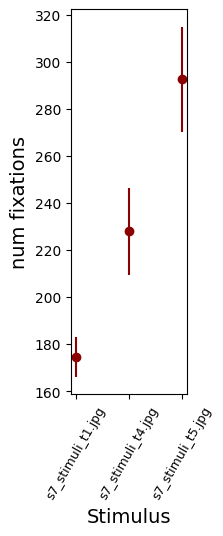

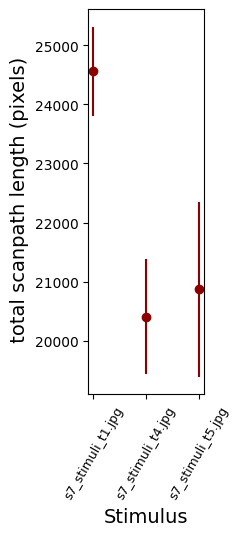

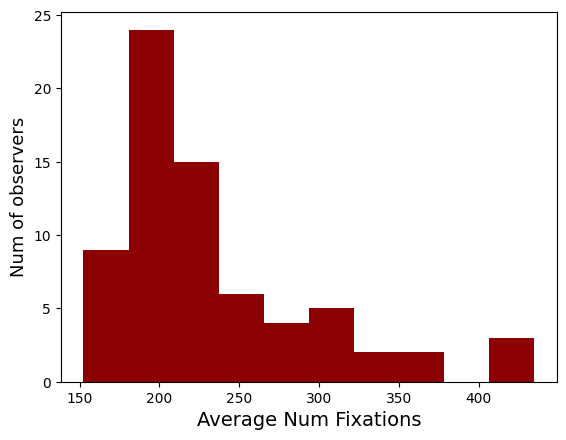

In [6]:

sizeX,sizeY=1680,1050


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='orig_fix_x',mean_y='orig_fix_y',FixDuration='duration_ms',Stimulus='stimfile',subjectID='sid', StimPath=Path+'images/',StimExt='.jpg')
DyslexiaDat.RunDescriptiveFix(Visual=1)

In [7]:
# for every subject calculate the Gaussian Mixture Model for the fixations finding the best number of clusters by expectation maximization
# then create a matrix Subject x Subject giving a similarity measure between the GMM of every pair of subjects
from sklearn.mixture import GaussianMixture
import time

list_sitm = np.unique(DyslexiaDat.stimuli)
list_subj = np.unique(DyslexiaDat.subjects)

for s in range(DyslexiaDat.ns):
    fixx, fixy = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[1])
    X = np.column_stack((fixx, fixy))
    bic = []
    begin = time.time()
    for i in range(1,100):
        gmm = GaussianMixture(n_components=i, covariance_type='full', max_iter=100, n_init=10)
        gmm.fit(X)
        bic.append(gmm.bic(X))
    end = time.time()
    best_n = np.argmin(bic)
    gmm = GaussianMixture(n_components=best_n)
    gmm.fit(X)
    print(s, best_n)
    print('Time:', end-begin)

0 98
Time: 68.52457642555237


KeyboardInterrupt: 

In [8]:
from scipy import ndimage

def SaliencyMapFilt(Fixies,SD=25,Ind=0):
    ''' Gaussian filter of fixations counts, Ind=1 for individual, Ind=0 for group '''
    if Ind==0:
        Smap=ndimage.gaussian_filter(np.mean(Fixies,0),SD)
    else:
        Smap=ndimage.gaussian_filter(Fixies,SD)
    return Smap

In [9]:
stim = DyslexiaDat.stimuli[1]
FixCounts=DyslexiaDat.FixCountCalc(stim,CutAct=0) 
smap=np.zeros_like(FixCounts)
for cs,s in enumerate(DyslexiaDat.subjects):
    smap[cs,:,:]=SaliencyMapFilt(FixCounts[cs,:,:],SD=25,Ind=1)

resolution x = 1680  y = 1050


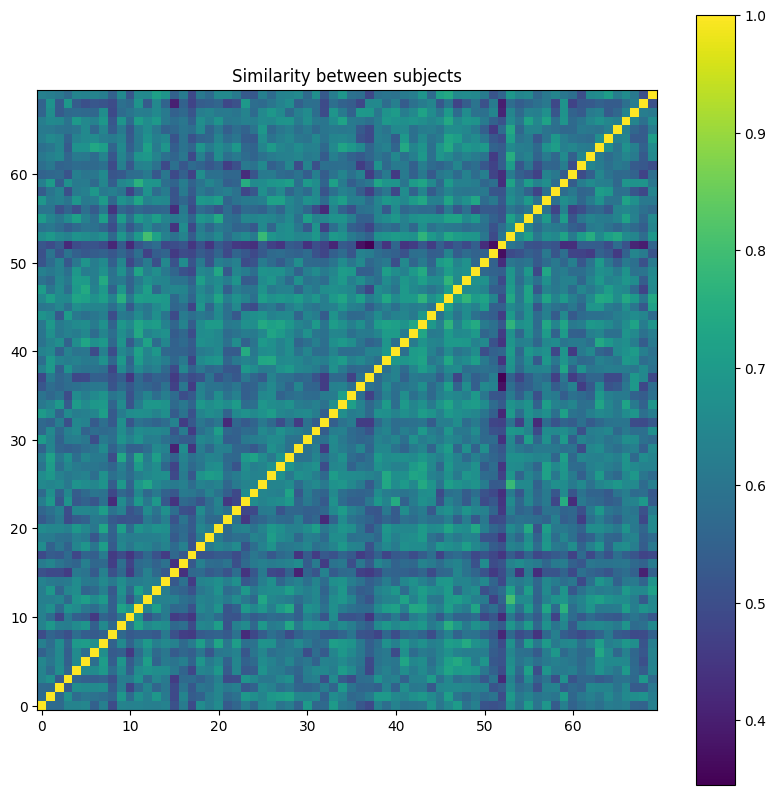

In [14]:
# compare heatmaps between each subject and plot the matrix
plt.figure(figsize=(10,10))
plt.imshow(np.corrcoef(smap.reshape(DyslexiaDat.ns,-1)),cmap='viridis', origin='lower')
plt.colorbar()
plt.title('Similarity between subjects')
plt.show()

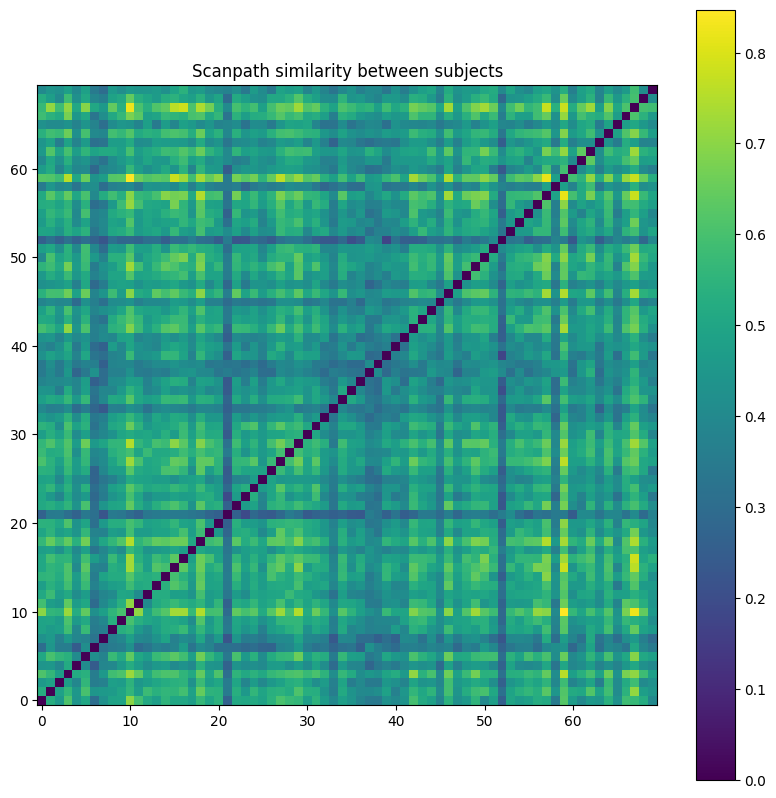

In [13]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=9, inferS=False)

plt.figure(figsize=(10,10))
plt.imshow(SimVals,cmap='viridis', origin='lower')
plt.colorbar()
plt.title('Scanpath similarity between subjects')
plt.show()

In [ ]:
# Flatten matrices to compute element-wise correlation
m1 = np.corrcoef(smap.reshape(DyslexiaDat.ns, -1))
m1 = 1 - m1
matrix1_flat = m1.flatten()
matrix2_flat = SimVals.flatten()

# Compute Pearson correlation between the two matrices
correlation = np.corrcoef(matrix1_flat, matrix2_flat)[0, 1]
print(f"Correlation between the two matrices: {correlation:.4f}")

Correlation between the two matrices: 0.1578


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


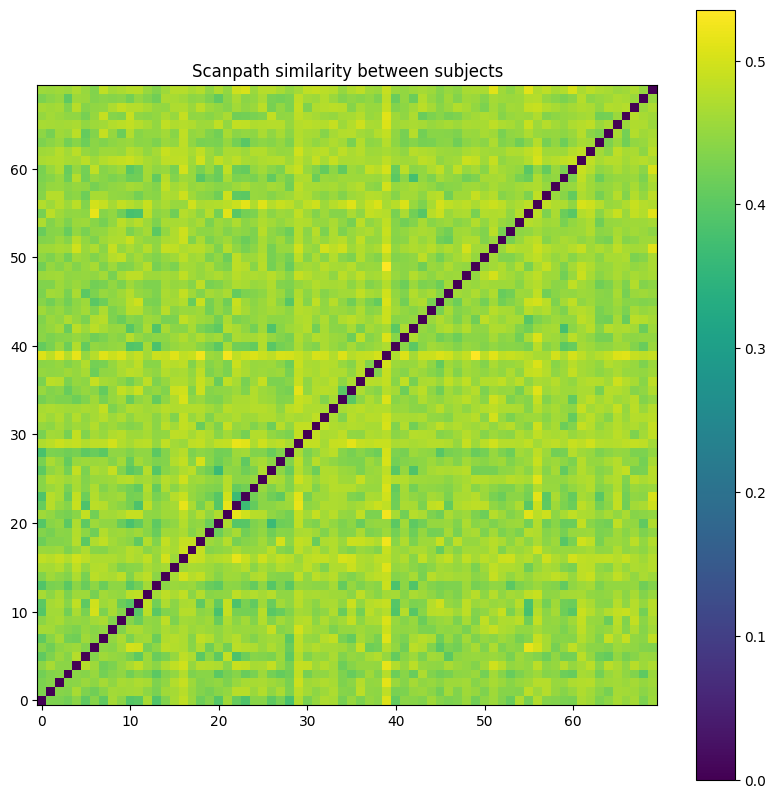

In [54]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=9, inferS=False, method='peak180')

plt.figure(figsize=(10,10))
plt.imshow(SimVals,cmap='viridis', origin='lower')
plt.colorbar()
plt.title('Scanpath similarity between subjects')
plt.show()

In [55]:
# Flatten matrices to compute element-wise correlation
m1 = np.corrcoef(smap.reshape(DyslexiaDat.ns, -1))
m1 = 1 - m1
matrix1_flat = m1.flatten()
matrix2_flat = SimVals.flatten()

# Compute Pearson correlation between the two matrices
correlation = np.corrcoef(matrix1_flat, matrix2_flat)[0, 1]
print(f"Correlation between the two matrices: {correlation:.4f}")

Correlation between the two matrices: 0.5892


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


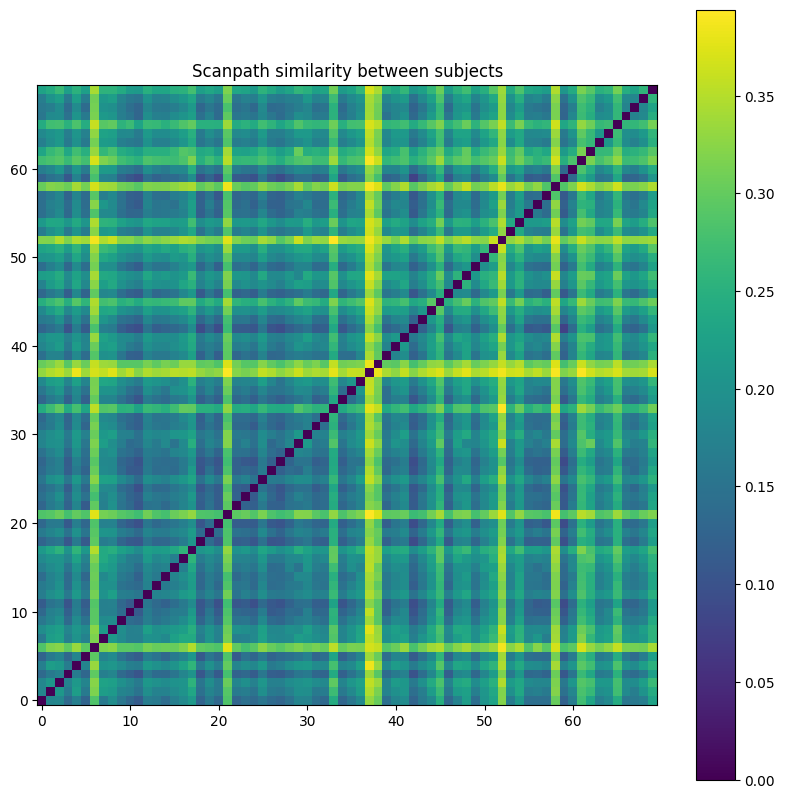

In [37]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=9, inferS=False, method='power')

plt.figure(figsize=(10,10))
plt.imshow(SimVals,cmap='viridis', origin='lower')
plt.colorbar()
plt.title('Scanpath similarity between subjects')
plt.show()

In [38]:
# Flatten matrices to compute element-wise correlation
m1 = np.corrcoef(smap.reshape(DyslexiaDat.ns, -1))
m1 = 1 - m1
matrix1_flat = m1.flatten()
matrix2_flat = SimVals.flatten()

# Compute Pearson correlation between the two matrices
correlation = np.corrcoef(matrix1_flat, matrix2_flat)[0, 1]
print(f"Correlation between the two matrices: {correlation:.4f}")

Correlation between the two matrices: 0.4583


In [72]:
#S = DyslexiaDat.HMMSimPipelineSubject2Subject(ncomp=[80], iter=1, stim=DyslexiaDat.stimuli[1], covar='spherical', n_iter=1000)

[141 221 204 222 203 167 339 196 157 216 146 198 277 209 171 160 243 196
 227 169 169 352 157 203 163 187 149 185 213 192 196 158 151 168 181 157
 193 391 327 167 198 225 136 205 261 222 203 169 254 183 271 245 391 249
 277 218 213 205 497 217 181 468 431 201 270 348 259 301 219 326]


ValueError: No model could be fitted: try different parameters

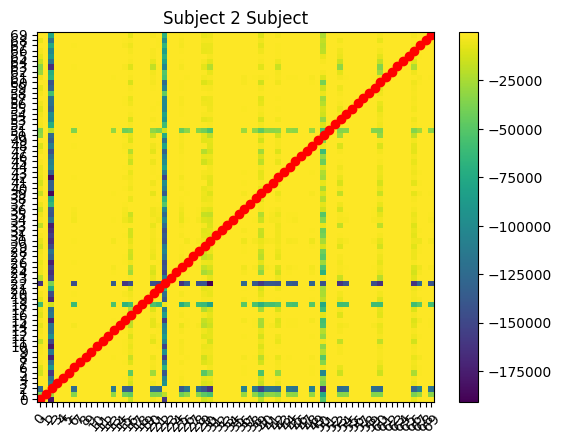

In [28]:
S = DyslexiaDat.HMMSimPipelineSubject2Subject(ncomp=[30], iter=10, stim=DyslexiaDat.stimuli[1], covar='spherical',  n_iter=100)

In [35]:
# Flatten matrices to compute element-wise correlation
m1 = np.corrcoef(smap.reshape(DyslexiaDat.ns, -1))
m1 = 1 - m1
matrix1_flat = m1.flatten()
matrix2_flat = S.flatten()

# Compute Pearson correlation between the two matrices
correlation = np.corrcoef(matrix1_flat, matrix2_flat)[0, 1]
print(f"Correlation between the two matrices: {correlation:.4f}")

Correlation between the two matrices: -0.0493
